Importing Libraries 

In [6]:
#!pip install pandas numpy matplotlib seaborn scipy

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
#Merging the dataset 
df1 = pd.read_csv("../data/Citations updated.csv", encoding='ISO-8859-1') #citations
df2 = pd.read_csv("../data/reproducibility_stamp.csv", encoding='ISO-8859-1') #repStamp
merged_df = df1.merge(df2[['Title','DOI']], on ='Title', how='left',suffixes=('', '_from_Rep_Sta'))
merged_df['DOI'] = merged_df['DOI'].combine_first(merged_df['DOI_from_Rep_Sta'])
merged_df.head()
merged_df.drop(columns=['DOI_from_Rep_Sta'],inplace=True)
merged_df.to_csv(r'../data/merged_data.csv', index=False, encoding='ISO-8859-1')
#merged citations.csv with reproducibility_stamp, now the rows with a DOI are of reports with reproducibility stamps

In [ ]:
#Checking for null values, verifying data types 
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ï»¿Cites        1400 non-null   int64  
 1   Authors         1400 non-null   object 
 2   Title           1400 non-null   object 
 3   Year            1400 non-null   int64  
 4   Source          1398 non-null   object 
 5   Publisher       1391 non-null   object 
 6   ArticleURL      1337 non-null   object 
 7   CitesURL        1204 non-null   object 
 8   GSRank          1400 non-null   int64  
 9   QueryDate       1400 non-null   object 
 10  Type            278 non-null    object 
 11  DOI             88 non-null     object 
 12  ISSN            0 non-null      float64
 13  CitationURL     0 non-null      float64
 14  Volume          0 non-null      float64
 15  Issue           0 non-null      float64
 16  StartPage       0 non-null      float64
 17  EndPage         0 non-null      f

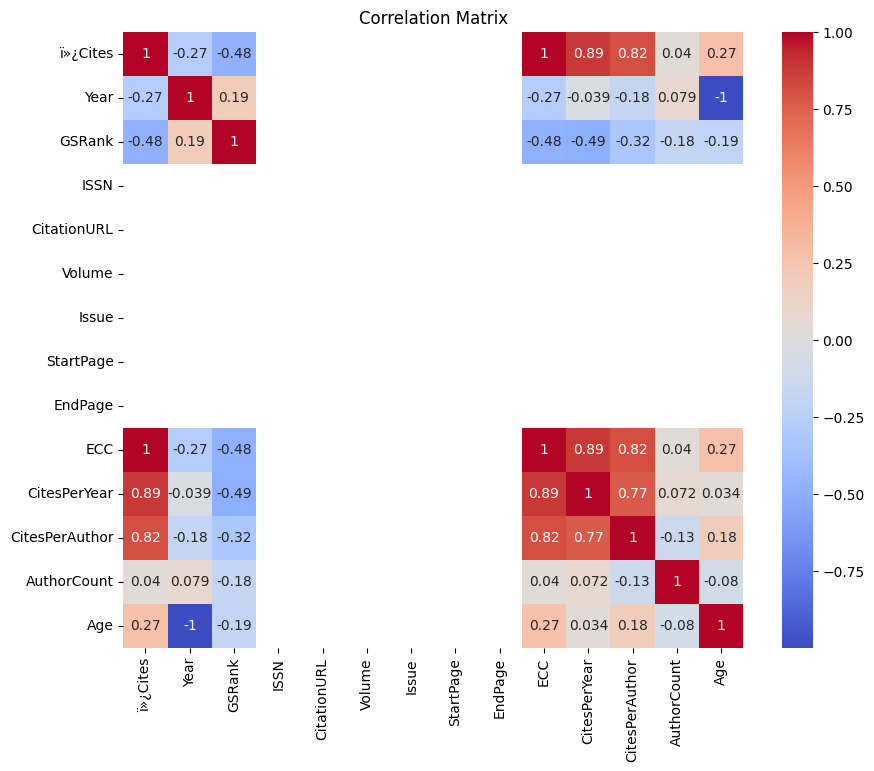

In [44]:
#Correlation matrix 
corr_matrix = merged_df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Remove coloumns with no futher use

In [49]:

coloumns_to_drop = ['ECC', 'Year' 'ISSN', 'Volume', 'Issue', 'StartPage', 'EndPage', 'CitationURL', 'FullTextURL', 'RelatedURL']
merged_df.drop(columns=coloumns_to_drop, inplace=True, errors='ignore')


Create a binary variable for reproducbility stamp

In [50]:
merged_df['IsReproducible?'] = merged_df['DOI'].notnull().astype(int) # added a reproducible boolean
merged_df.to_csv('./test.csv', index=False, encoding='ISO-8859-1')

TODO

Balancing (SMOTE)
Outlier removal
Duplicate Rows
Null values
Normalization
DATATYPE CHECK

In [61]:

# Checking what were left with, including nulls and counts and datatypes
merged_df.info()
merged_df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Authors          1400 non-null   object
 1   Title            1400 non-null   object
 2   Year             1400 non-null   int64 
 3   Source           1398 non-null   object
 4   Publisher        1391 non-null   object
 5   ArticleURL       1337 non-null   object
 6   CitesURL         1204 non-null   object
 7   GSRank           1400 non-null   int64 
 8   QueryDate        1400 non-null   object
 9   Type             278 non-null    object
 10  DOI              88 non-null     object
 11  AuthorCount      1400 non-null   int64 
 12  Age              1400 non-null   int64 
 13  Abstract         1336 non-null   object
 14  IsReproducible?  1400 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 164.2+ KB


Authors               0
Title                 0
Year                  0
Source                2
Publisher             9
ArticleURL           63
CitesURL            196
GSRank                0
QueryDate             0
Type               1122
DOI                1312
AuthorCount           0
Age                   0
Abstract             64
IsReproducible?       0
dtype: int64

In [ ]:
merged_df.nunique() # checking for unique values
